## Advertising Campaign Effectiveness Prediction

### Background
A company has been investing in advertising campaigns through various media channels, namely TV, Radio, and Newspaper. The dataset provided includes information on the amount spent on each media channel in million dollars (TV, Radio, Newspaper), as well as the resulting sales hike in million dollars.

### Problem Statement
The goal of this analysis is to build a predictive model that can effectively estimate the impact of advertising expenditures on sales. Specifically, we aim to understand the relationship between the advertising spending on different media channels (TV, Radio, Newspaper) and the corresponding increase in sales.

### Dataset
The dataset consists of several observations, each representing a specific advertising campaign. The columns are as follows:
- **TV:** Amount spent on TV advertising (in million dollars).
- **Radio:** Amount spent on Radio advertising (in million dollars).
- **Newspaper:** Amount spent on Newspaper advertising (in million dollars).
- **Sales:** Sales hike caused by the advertising campaign (in million dollars).

### Approach
We will explore and analyze the dataset to identify patterns and correlations between advertising expenditures and sales. Subsequently, we will develop an ANN model, to forecast the sales hike based on the amounts invested in TV, Radio, and Newspaper advertising.

### Expected Outcome
The developed ANN model will serve as a valuable tool for the company to optimize its advertising budget allocation, ensuring a more efficient and effective strategy to maximize sales.



## Importing all necessary libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Downloading the data from the google drive link

In [ ]:
!gdown https://drive.google.com/uc?id=1uq9lFXVzGcXQvw4FntGezPXqsZ0zJMpA

Downloading...
From: https://drive.google.com/uc?id=1uq9lFXVzGcXQvw4FntGezPXqsZ0zJMpA
To: /content/advertising.csv
100% 3.86k/3.86k [00:00<00:00, 20.0MB/s]


In [ ]:
df = pd.read_csv('advertising.csv')
print(df.shape)


(200, 4)


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Sales'].sort_values(ascending=False)
correlation_with_target

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical


In [ ]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape=(3,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "linear"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               512       
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 10881 (42.50 KB)
Trainable params: 10881 (42.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])


In [ ]:
data = df.drop('Sales', axis=1)
labels = df['Sales']

print(data.shape)
print(labels.shape)

(200, 3)
(200,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(160, 3)
(40, 3)


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_data = (X_test_scaled, y_test))

Epoch 1/150
5/5 [==============================] - 1s 40ms/step - loss: 258.3318 - mean_squared_error: 258.3318 - val_loss: 228.0759 - val_mean_squared_error: 228.0759
Epoch 2/150
5/5 [==============================] - 0s 10ms/step - loss: 250.5636 - mean_squared_error: 250.5636 - val_loss: 221.2561 - val_mean_squared_error: 221.2561
Epoch 3/150
5/5 [==============================] - 0s 8ms/step - loss: 242.4170 - mean_squared_error: 242.4170 - val_loss: 212.1201 - val_mean_squared_error: 212.1201
Epoch 4/150
5/5 [==============================] - 0s 8ms/step - loss: 231.7432 - mean_squared_error: 231.7432 - val_loss: 199.9488 - val_mean_squared_error: 199.9488
Epoch 5/150
5/5 [==============================] - 0s 7ms/step - loss: 217.7063 - mean_squared_error: 217.7063 - val_loss: 184.0512 - val_mean_squared_error: 184.0512
Epoch 6/150
5/5 [==============================] - 0s 7ms/step - loss: 199.5444 - mean_squared_error: 199.5444 - val_loss: 163.6633 - val_mean_squared_error: 163.6

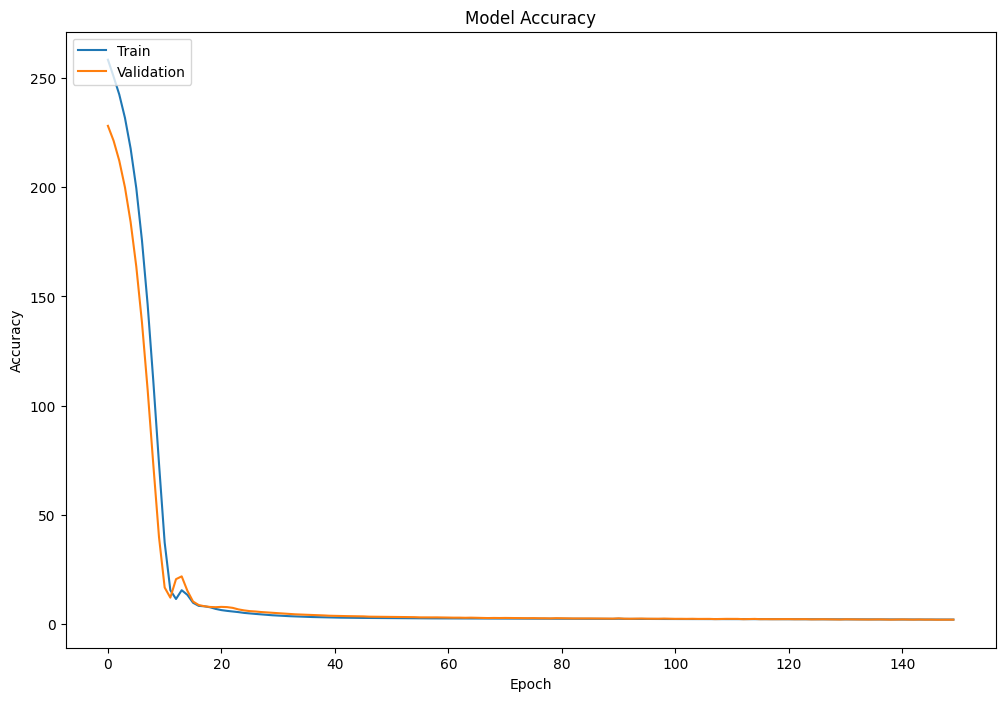

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Training Vs Testing Accuracy")
# Plot training & validation loss values
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test loss:", accuracy)


2/2 [==============================] - 0s 4ms/step - loss: 2.1173 - mean_squared_error: 2.1173
Test loss: 2.1173033714294434


## Making Predictions in the test data

In [ ]:
predictions = model.predict(X_test_scaled)
print("Predictions for new data:", predictions)

2/2 [==============================] - 0s 4ms/step
Predictions for new data: [[17.623896 ]
 [21.141394 ]
 [23.371567 ]
 [ 8.110754 ]
 [22.283787 ]
 [12.479468 ]
 [21.686613 ]
 [ 8.860749 ]
 [16.76256  ]
 [17.023438 ]
 [ 8.294019 ]
 [ 8.8476   ]
 [18.248222 ]
 [ 6.831279 ]
 [12.872098 ]
 [15.074597 ]
 [ 7.1634254]
 [18.020838 ]
 [11.215668 ]
 [20.3567   ]
 [21.122663 ]
 [12.544864 ]
 [ 9.901099 ]
 [22.67156  ]
 [ 9.787448 ]
 [ 8.321062 ]
 [21.454704 ]
 [14.18891  ]
 [11.20552  ]
 [ 6.7980113]
 [15.69878  ]
 [10.77761  ]
 [21.54035  ]
 [ 9.356916 ]
 [20.998796 ]
 [21.229254 ]
 [11.063064 ]
 [22.705048 ]
 [13.127524 ]
 [ 6.618797 ]]


In [ ]:
predictions = predictions.reshape(40,)
print(predictions)

[17.623896  21.141394  23.371567   8.110754  22.283787  12.479468
 21.686613   8.860749  16.76256   17.023438   8.294019   8.8476
 18.248222   6.831279  12.872098  15.074597   7.1634254 18.020838
 11.215668  20.3567    21.122663  12.544864   9.901099  22.67156
  9.787448   8.321062  21.454704  14.18891   11.20552    6.7980113
 15.69878   10.77761   21.54035    9.356916  20.998796  21.229254
 11.063064  22.705048  13.127524   6.618797 ]


In [ ]:
test_vs_pred_df = pd.DataFrame({"test": y_test, "pred": predictions})

In [ ]:
test_vs_pred_df

,test,pred
95,16.9,17.623896
15,22.4,21.141394
30,21.4,23.371567
158,7.3,8.110754
128,24.7,22.283787
115,12.6,12.479468
69,22.3,21.686613
170,8.4,8.860749
174,16.5,16.762560
45,16.1,17.023438
